<a href="https://colab.research.google.com/github/Steven-Sarmiento/Proyectos/blob/Mec%C3%A1nica-Cl%C3%A1sica/P1_Soluci%C3%B3n_num%C3%A9rica_a_la_ecuaci%C3%B3n_de_Duffing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solución numérica a la ecuación de Duffing**

- **Jorge Steven Sarmiento Arboleda**
- **E-mail:** steven.sarmiento@udea.edu.co
- **Instituto de Física, Universidad de Antioquia.**

# **Planteamiento del problema**

La ecuación de Duffing es un modelo fundamental en la dinámica no lineal que describe sistemas oscilatorios bajo la influencia de amortiguamiento, excitación periódica y no linealidad$^{[1]}$. En este informe, se propone resolver numéricamente dicha ecuación para investigar el comportamiento de un oscilador no lineal. El enfoque principal se centra en cómo varía la respuesta del sistema ante diferentes **frecuencias de excitación** manteniendo los demás parámetros estables. Los valores de la frecuencia de excitación considerados son $\gamma = \omega_0, \omega_0/2, 2\omega_0, 3\omega_0$, con el objetivo de analizar el impacto de estas frecuencias sobre el desplazamiento, el espacio de fases y el espectro de Fourier del sistema. Este análisis permitirá evaluar cómo las variaciones en la frecuencia de excitación y la no linealidad del modelo afectan la dinámica del sistema.

---

# **Teoría**
---

## **Ecuación de Duffing**

La ecuación de Duffing describe un sistema oscilatorio no lineal sometido a amortiguamiento, elasticidad y excitación externa periódica. Matemáticamente, se expresa como:

$$\ddot{x} + \delta \dot{x} + \omega_0^2 x + \beta x^3 = F \cos(\gamma t)$$

Los términos clave son:
- **$\delta \dot{x}$**: **Amortiguamiento viscoso** que disipa energía en el sistema, moderando las oscilaciones.
- **$\omega_0^2 x$**: **Elasticidad lineal** que genera una fuerza restauradora proporcional al desplazamiento.
- **$\beta x^3$**: **Elasticidad no lineal**, que introduce complejidades dinámicas adicionales al sistema.
- **$F \cos(\gamma t)$**: **Fuerza externa periódica** que actúa como excitación, influenciada por la frecuencia $\gamma$.

Este modelo es utilizado para analizar fenómenos tales como:
- **Resonancia no lineal**: Cuando la frecuencia de excitación $\gamma$ se aproxima a la frecuencia natural del sistema $\omega_0$, el sistema puede experimentar grandes oscilaciones debido a la transferencia de energía a través de la excitación externa.
- **Interacción no lineal**: La no linealidad introduce complejidad en las trayectorias del sistema, generando la aparición de armónicos y la modificación de las frecuencias de oscilación.
- **Comportamiento multifrecuencial**: Dependiendo de la relación entre la frecuencia natural $\omega_0$ y la frecuencia de excitación $\gamma$, el sistema puede exhibir oscilaciones en múltiples frecuencias, reflejando la interacción entre la no linealidad y la excitación externa.

---
### **Resonancia no lineal**

La resonancia no lineal ocurre cuando la frecuencia de excitación externa $\gamma$ se acerca a la frecuencia natural $\omega_0$ del sistema. En este caso, las oscilaciones se amplifican significativamente debido a la transferencia de energía eficiente. Sin embargo, la presencia de la no linealidad altera las características de la resonancia, haciendo que el sistema se comporte de manera diferente a un oscilador lineal, introduciendo armónicos y subarmónicos que modifican la frecuencia de las oscilaciones$^{[2]}$.

---
### **No linealidad y su impacto en el sistema**

La no linealidad del sistema, representada por el término $\beta x^3$, es responsable de la aparición de comportamientos complejos, tales como la coexistencia de diferentes frecuencias y la modificación de la amplitud de las oscilaciones. Esta no linealidad interactúa con la excitación externa, alterando la dinámica del sistema. En situaciones de resonancia, la no linealidad puede generar oscilaciones con armónicos, lo que resulta en un espectro de Fourier más complejo. Fuera de la resonancia, el sistema muestra una dinámica más regular, pero aún influenciada por la no linealidad$^{[3]}$.

---
### **Amortiguamiento**

El **amortiguamiento** juega un papel crucial en la evolución del sistema. El término $\delta \dot{x}$ representa la pérdida de energía debido a la fricción o la resistencia del medio. El amortiguamiento puede influir significativamente en la duración del régimen transitorio y en la amplitud de las oscilaciones en el estado estacionario. Un valor bajo de amortiguamiento, como el utilizado en este estudio, permite observar cómo el sistema evoluciona hacia el estado estacionario sin que las oscilaciones se disipan demasiado rápido.

---
### **Interacción entre la frecuencia de excitación y la frecuencia natural**

La relación entre la frecuencia de excitación externa $\gamma$ y la frecuencia natural $\omega_0$ del sistema es clave para entender la dinámica del oscilador de Duffing. Cuando $\gamma \approx \omega_0$, el sistema puede experimentar **resonancia**, lo que amplifica las oscilaciones. Sin embargo, debido a la no linealidad, el comportamiento resonante es más complejo que en los osciladores lineales. Cuando $\gamma$ se aleja de $\omega_0$, el sistema presenta oscilaciones más regulares, pero aún bajo la influencia de la excitación externa.

---
### **Métodos numéricos**

Los métodos numéricos son esenciales para simular y estudiar la dinámica de sistemas no lineales como el de Duffing. En este trabajo se utilizó el algoritmo **LSODE** (Livermore Solver for Ordinary Differential Equations), que es eficiente para resolver ecuaciones diferenciales ordinarias de primer orden como la ecuación de Duffing. Este método es particularmente útil para sistemas que incluyen amortiguamiento y fuerzas externas$^{[4]}$.

---

# **Solución**

---
Para resolver numéricamente la ecuación de Duffing y analizar su comportamiento bajo diferentes frecuencias de excitación externa ($\gamma$), se emplea el método **LSODA** de la librería `odeint` de Python. Este método se adapta automáticamente entre esquemas explícitos e implícitos, dependiendo de la rigidez del sistema, lo que lo hace adecuado para problemas que incluyen comportamientos tanto suaves como rígidos, como es el caso de la ecuación de Duffing. La capacidad de adaptarse a la rigidez del sistema es una característica clave que lo hace eficiente en la resolución de ecuaciones diferenciales no lineales, como la que se analiza en este estudio$^{[4]}$.

---



## **Procedimiento**
---
### **1. Reformulación de la ecuación**

La ecuación de Duffing, inicialmente expresada como una ecuación diferencial de segundo orden, se transforma en un sistema de ecuaciones de primer orden para facilitar su resolución numérica. Esto se realiza de la siguiente manera:

- $\frac{dx}{dt} = v$
- $\frac{dv}{dt} = -\delta v - \omega_0^2 x - \beta x^3 + F \cos(\gamma t)$

Este cambio permite emplear el integrador LSODA, conocido por su eficiencia en sistemas de ecuaciones rígidas y no rígidas, para obtener soluciones precisas.

---

### **2. Definición de parámetros y condiciones iniciales**

#### **Elección de los parámetros**

La selección de los parámetros del sistema se realiza con el objetivo de resaltar los efectos de la no linealidad y explorar dinámicas complejas:

- Se asignaron **valores altos** al coeficiente de amortiguación no lineal ($\beta$) y a la amplitud de la fuerza externa ($F$) para enfatizar las interacciones no lineales y garantizar oscilaciones amplias.
- El coeficiente de amortiguación lineal ($\delta$) se fijó en un **valor bajo** para evitar un amortiguamiento excesivo que suprima rápidamente las oscilaciones.

Los valores utilizados fueron los siguientes:
- **Frecuencia natural**: $\omega_0 = 1.0$
- **Coeficiente de amortiguación lineal**: $\delta = 0.1$
- **Coeficiente de no linealidad**: $\beta = 0.8$
- **Amplitud de la fuerza externa**: $F = 1.0$

#### **Condiciones iniciales**

- Desplazamiento inicial: $x(0) = 0.0$
- Velocidad inicial: $v(0) = 0.0$

El tiempo de integración se definió como $t \in [0, 100]$, con un paso de tiempo $dt = 0.01$. Estas condiciones aseguran una simulación suficientemente larga para observar tanto los transitorios como el estado estacionario del sistema.

---

### **3. Implementación y ejecución**

El sistema de ecuaciones transformado se resolvió numéricamente utilizando el integrador LSODA. Este método ajusta automáticamente el paso de integración según la rigidez del sistema, garantizando precisión y eficiencia.

Se analizaron diferentes valores de la frecuencia de excitación externa ($\gamma$) para evaluar cómo esta afecta la dinámica del sistema. Los valores considerados fueron:
- $\gamma = \omega_0$
- $\gamma = \omega_0 / 2$
- $\gamma = 2\omega_0$
- $\gamma = 3\omega_0$

---

### **4. Visualización de resultados**

La interpretación de los resultados se realizó mediante tres tipos principales de gráficas que proporcionan una visión integral del comportamiento del sistema:

1. **Solución temporal ($x(t)$):**
   - Se graficó el desplazamiento $x(t)$ en función del tiempo para cada valor de $\gamma$. Esto permitió observar tanto los transitorios iniciales como el comportamiento estacionario.

2. **Espacio de fases:**
   - Se representaron las trayectorias del sistema en el espacio de fases ($x$ vs. $v$), lo que permitió identificar patrones de oscilación y analizar la estabilidad y periodicidad del sistema.

3. **Espectro de Fourier:**
   - Mediante la transformada de Fourier, se analizaron las frecuencias predominantes en el desplazamiento $x(t)$. Esto permitió estudiar la estructura frecuencial del sistema, revelando la presencia de armónicos, subarmónicos y la influencia de la no linealidad en el espectro.

---


## **Código para la resolución y visualización**

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 1. Reformular la ecuación de Duffing para su resolución numérica.
def duffing(y, t, delta, omega0, beta, F, gamma):
    x, v = y
    dxdt = v
    dvdt = -delta * v - omega0**2 * x - beta * x**3 + F * np.cos(gamma * t)
    return [dxdt, dvdt]

# 2. Definición de parámetros y condiciones iniciales.
omega0 = 1  # Frecuencia natural
gamma_values = [0.5, 1, 2, 3]  # Frecuencias de la fuerza externa (cerca de w0, w0/2, 2w0, 3w0)
omega_multiples = [f'{gamma}ω₀' for gamma in gamma_values]  # Etiquetas con múltiplos de omega₀

## Parámetros adicionales
delta = 0.1  # Coeficiente de amortiguamiento
beta = 0.8   # Coeficiente no lineal
F = 1.0        # Amplitud de la fuerza externa


## Condiciones iniciales
x0 = 0.0  # Desplazamiento inicial
v0 = 0.0  # Velocidad inicial
y0 = [x0, v0]

## Tiempo
t0 = 0
tf = 100
dt = 0.01
t_eval = np.arange(t0, tf, dt)

## Colores predeterminados para las gráficas
colors = ['blue', 'gold', 'red', 'green']

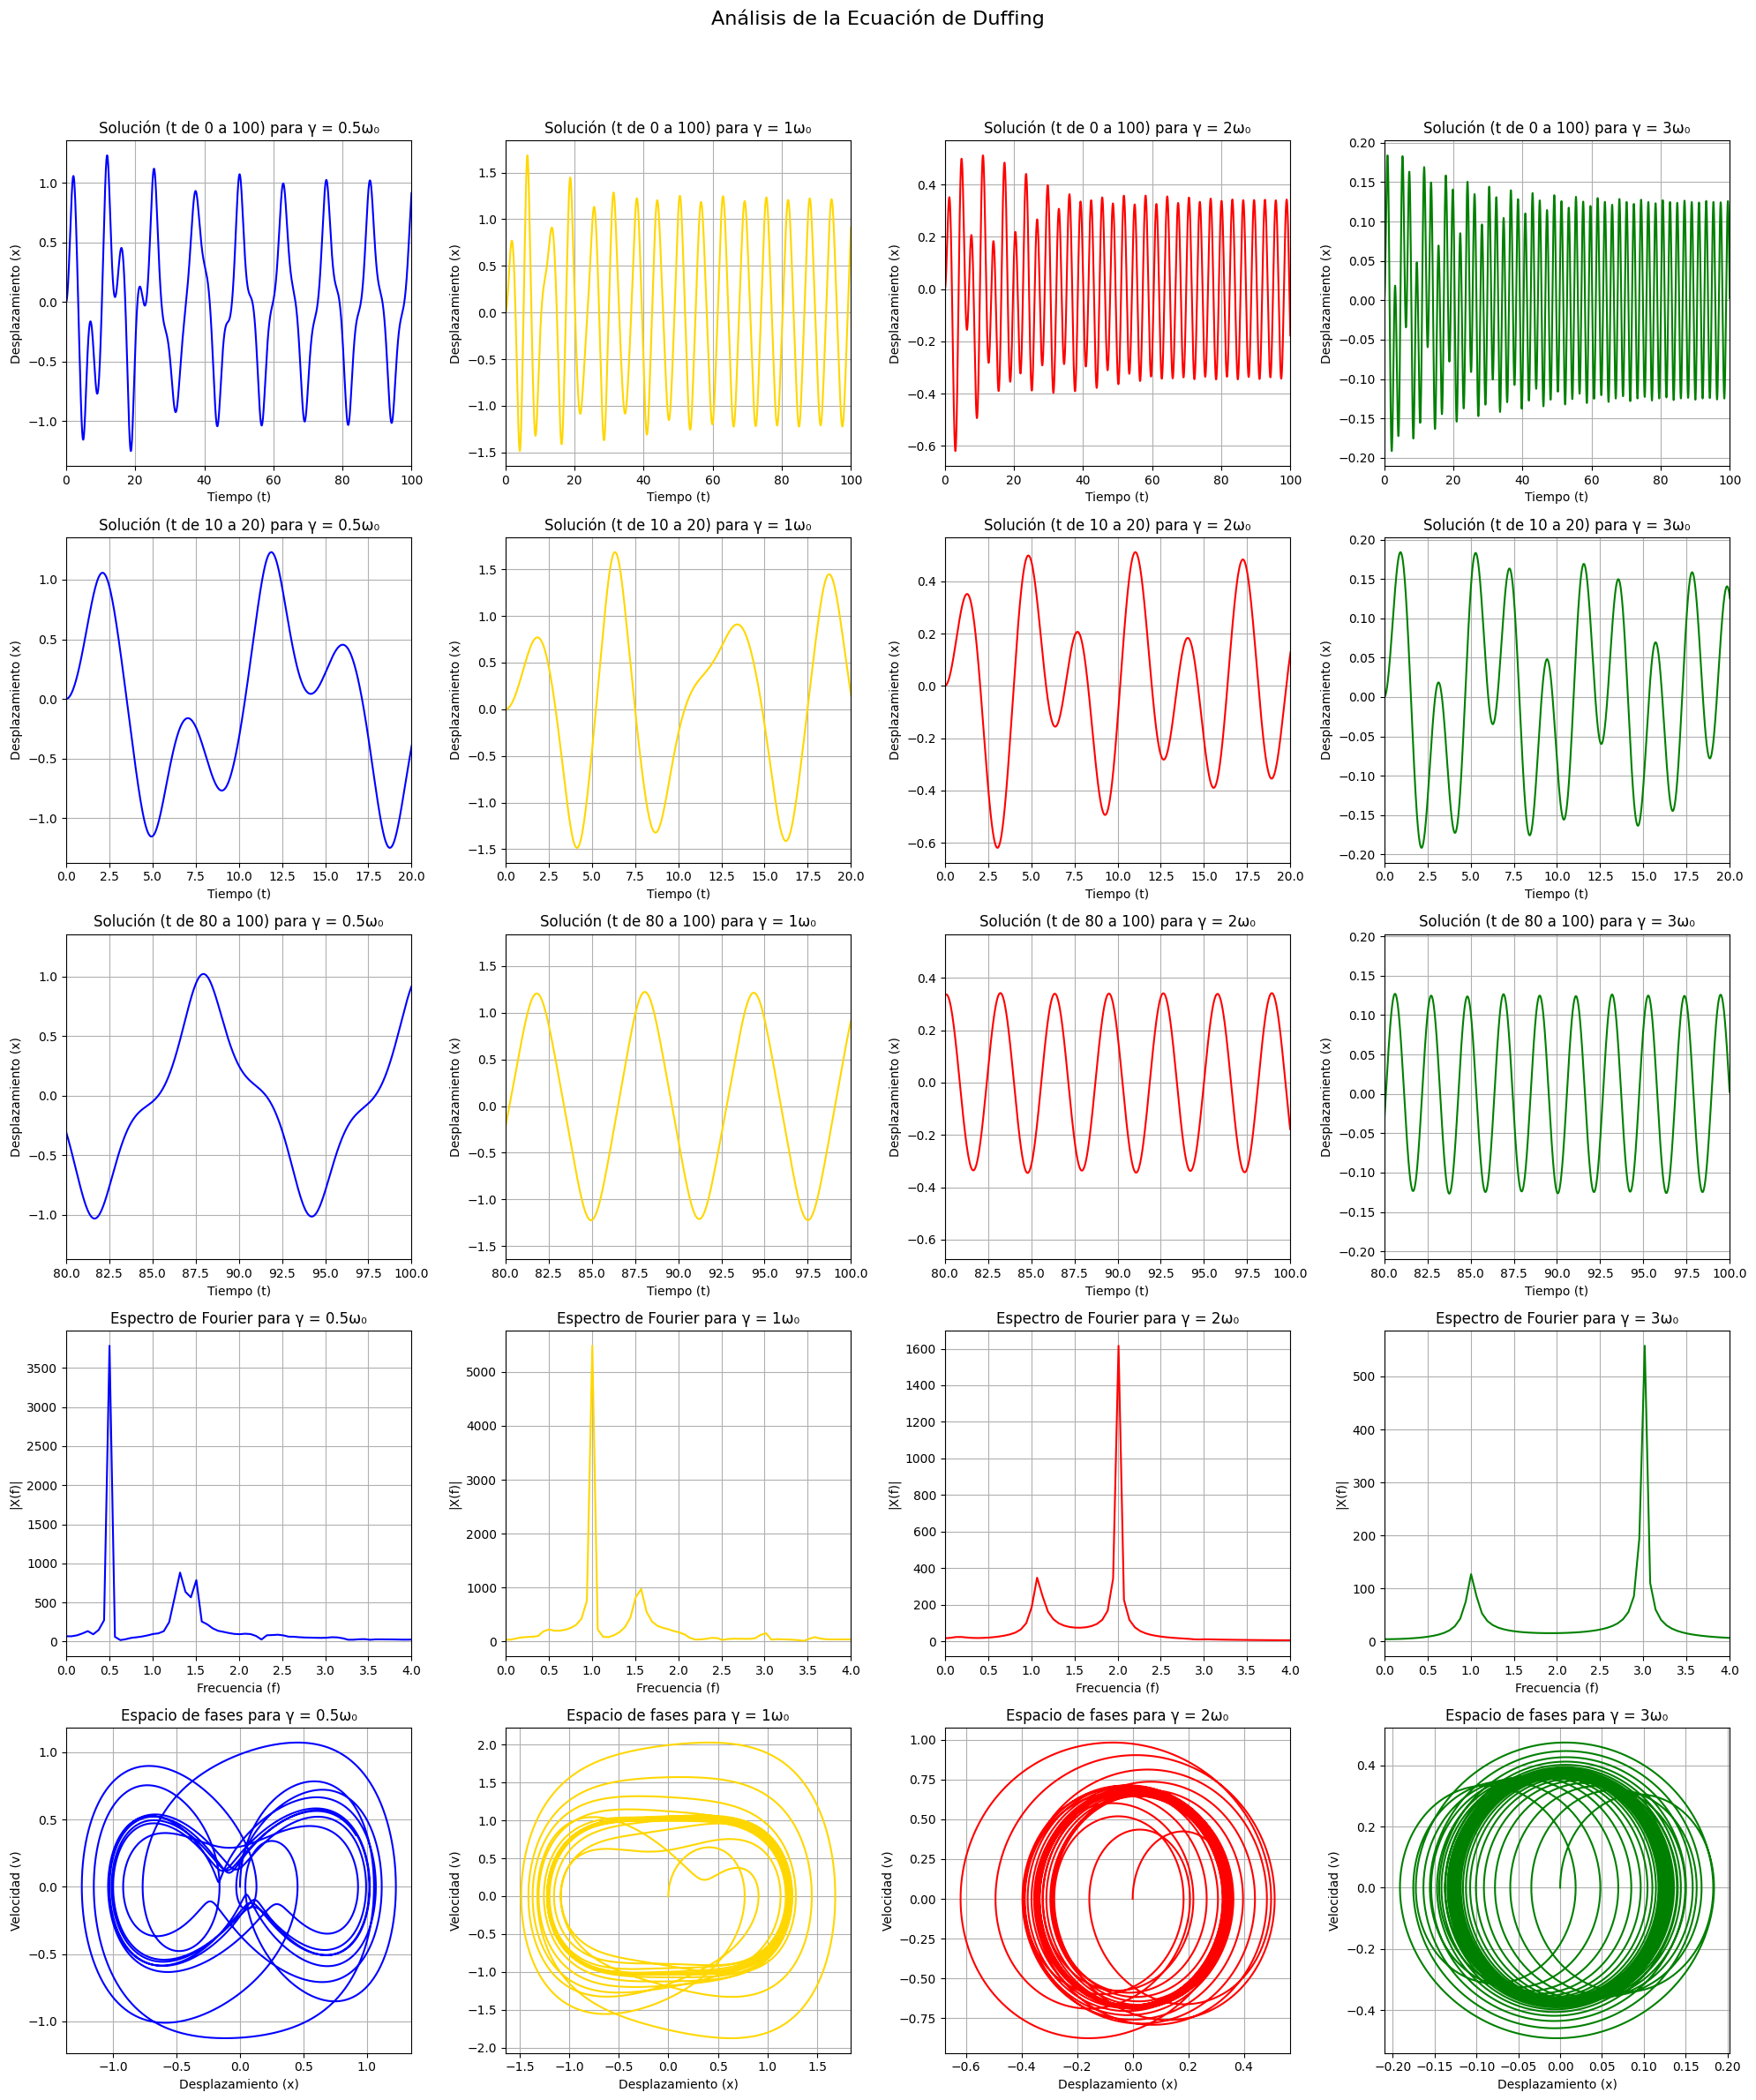

In [ ]:

## Crear la figura para las tres visualizaciones (solución temporal, diagrama de fase y análisis de Fourier)
fig, axes = plt.subplots(5, len(gamma_values), figsize=(20, 25))
plt.suptitle('Análisis de la Ecuación de Duffing', fontsize=16)

# 3. Resolver la ecuación y realizar las gráficas
for i, gamma in enumerate(gamma_values):
    ## Resolver la ecuación de Duffing
    sol = odeint(duffing, y0, t_eval, args=(delta, omega0, beta, F, gamma))
    x = sol[:, 0]  # Desplazamiento

   ## Gráfica de x(t) de 0 a 100
    axes[0, i].plot(t_eval, x, color=colors[i], label=f'\u03B3 = {omega_multiples[i]}')
    axes[0, i].set_title(f'Solución (t de 0 a 100) para \u03B3 = {omega_multiples[i]}')
    axes[0, i].set_xlabel('Tiempo (t)')
    axes[0, i].set_ylabel('Desplazamiento (x)')
    axes[0, i].grid(True)
    axes[0, i].set_xlim(0, 100)

   ## Gráfica de x(t) de 0 a 10
    axes[1, i].plot(t_eval, x, color=colors[i], label=f'\u03B3 = {omega_multiples[i]}')
    axes[1, i].set_title(f'Solución (t de 10 a 20) para \u03B3 = {omega_multiples[i]}')
    axes[1, i].set_xlabel('Tiempo (t)')
    axes[1, i].set_ylabel('Desplazamiento (x)')
    axes[1, i].grid(True)
    axes[1, i].set_xlim(0, 20)

    ## Gráfica de x(t) de 80 a 100
    axes[2, i].plot(t_eval, x, color=colors[i], label=f'\u03B3 = {omega_multiples[i]}')
    axes[2, i].set_title(f'Solución (t de 80 a 100) para \u03B3 = {omega_multiples[i]}')
    axes[2, i].set_xlabel('Tiempo (t)')
    axes[2, i].set_ylabel('Desplazamiento (x)')
    axes[2, i].grid(True)
    axes[2, i].set_xlim(80, 100)

    ## Transformada de Fourier
    X_f = np.fft.fft(x)
    freqs = np.fft.fftfreq(len(x), dt)
    magnitude = np.abs(X_f)  # Magnitud del espectro

    ## Filtrar frecuencias positivas
    freqs = 2*np.pi*freqs[freqs >= 0]
    magnitude = magnitude[:len(freqs)]

    ## Gráfica de Fourier
    axes[3, i].plot(freqs, magnitude, color=colors[i])
    axes[3, i].set_title(f'Espectro de Fourier para \u03B3 = {omega_multiples[i]}')
    axes[3, i].set_xlabel('Frecuencia (f)')
    axes[3, i].set_ylabel('|X(f)|')
    axes[3, i].set_xlim(0, 4)  # Limitar la frecuencia
    axes[3, i].grid(True)

    ## Diagrama de fase
    axes[4, i].plot(sol[:, 0], sol[:, 1], label=f'{omega_multiples[i]}', color=colors[i])  # Graficar x vs v
    axes[4, i].set_title(f'Espacio de fases para \u03B3 = {omega_multiples[i]}')
    axes[4, i].set_xlabel('Desplazamiento (x)')
    axes[4, i].set_ylabel('Velocidad (v)')
    axes[4, i].grid(True)



# 4. Ajustar el espacio entre las gráficas y mostrar
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **Análisis, conclusiones y perspectivas sobre el comportamiento de la ecuación de Duffing**

---

## **Análisis de resultados**


Las simulaciones realizadas permitieron explorar la rica dinámica del oscilador no lineal regido por la ecuación de Duffing bajo diversas condiciones de excitación externa ($\gamma$). Los resultados muestran cómo las características del sistema varían con la relación entre $\gamma$ y la frecuencia natural del sistema ($\omega_0$), exhibiendo transitorios, resonancia y comportamientos multifrecuenciales.

---
### **1. Comportamiento temporal $x(t)$**

El análisis temporal muestra tres etapas principales: un transitorio inicial, una evolución intermedia y el estado estacionario. El transitorio está dominado por oscilaciones complejas cuya duración depende del amortiguamiento ($\delta$) y las condiciones iniciales.

Cuando $\gamma \approx \omega_0$, el sistema presenta resonancia, amplificando significativamente la amplitud de las oscilaciones. Este fenómeno resalta la interacción entre la fuerza externa y la no linealidad del sistema, que genera dinámicas más complejas en comparación con un oscilador lineal. Las gráficas de $x(t)$ en intervalos como $[0, 100]$, $[0, 20]$ y $[80, 100]$ permiten visualizar cómo el sistema evoluciona desde el transitorio hasta el estado estacionario.

---
### **2. Espectros de Fourier**

El análisis frecuencial evidencia la influencia de la no linealidad en la aparición de armónicos y subarmónicos. En condiciones resonantes ($\gamma \approx \omega_0$), se detectan picos significativos alrededor de la frecuencia de excitación, acompañados de armónicos que reflejan la transferencia eficiente de energía al sistema.

En escenarios fuera de la resonancia ($\gamma \neq \omega_0$), el espectro se simplifica, dominado por las frecuencias características del sistema: $\omega_0$ y $\gamma$. Sin embargo, la no linealidad permite la coexistencia de estas frecuencias, aunque con menor intensidad. Este comportamiento destaca cómo el sistema transita de una dinámica resonante a una más regular según $\gamma$ se aleja de $\omega_0$.

---
### **3. Espacio de fases**

Las trayectorias en el espacio de fases ($x$ vs. $v$) ilustran las diferencias dinámicas del sistema según la relación entre $\gamma$ y $\omega_0$:

- Para $\gamma \approx \omega_0$, las órbitas forman elipses de gran amplitud debido a la resonancia.
- En condiciones como $\gamma = 0.5 \omega_0$, las trayectorias presentan una morfología compleja, como figuras en forma de "ocho", que reflejan la interacción entre las frecuencias del sistema y la excitación externa.
- Cuando $\gamma$ es significativamente diferente de $\omega_0$, las trayectorias se vuelven más regulares, con órbitas cerradas que evidencian una menor transferencia de energía.

---

## **Conclusiones**

1. **No linealidad y resonancia:** La ecuación de Duffing introduce una rica estructura de armónicos y subarmónicos, particularmente cuando $\gamma \approx \omega_0$. La resonancia amplifica las oscilaciones y distorsiona las trayectorias típicas del espacio de fases.

2. **Influencia de parámetros clave:** El amortiguamiento ($\delta$) y la no linealidad ($\beta$) son cruciales en la modulación de la dinámica del sistema. Afectan la duración del transitorio, la amplitud de las oscilaciones y la complejidad de las trayectorias en el estado estacionario.

3. **Transitorios y estado estacionario:** La duración del régimen transitorio depende de las condiciones iniciales y la relación entre $\gamma$ y $\omega_0$. Este comportamiento destaca la importancia de estudiar tanto la dinámica transitoria como la asintótica para comprender completamente el sistema.

4. **Complejidad multifrecuencial:** En condiciones resonantes o cercanas a $\gamma = 0.5 \omega_0$, el sistema exhibe comportamientos multifrecuenciales. Este fenómeno, observable en los espectros de Fourier y el espacio de fases, refleja la interacción no lineal entre las características naturales del sistema y la excitación externa.

5. **Aplicaciones prácticas:** Los resultados tienen implicaciones directas en el diseño de sistemas como resonadores mecánicos, circuitos eléctricos y dispositivos MEMS, donde es fundamental prever y controlar la dinámica no lineal para evitar inestabilidades o comportamientos no deseados.

6. **Estabilidad y caos:** Aunque no se detectaron comportamientos caóticos en este análisis, la estructura multifrecuencial observada sugiere que el sistema podría transitar al caos bajo ciertas condiciones. Para caracterizar este régimen, se requieren herramientas adicionales como exponentes de Lyapunov o secciones de Poincaré.

---

## **Perspectivas**

1. **Extensión del análisis paramétrico:** Futuras investigaciones podrían explorar cómo la variación de $\beta$, $\delta$ y las condiciones iniciales afectan la transición al caos o la estabilidad del sistema.

2. **Análisis del caos:** La identificación rigurosa de regímenes caóticos mediante herramientas avanzadas (mapas de retorno, diagramas de Poincaré, exponentes de Lyapunov) permitiría profundizar en la dinámica no lineal de la ecuación de Duffing.

3. **Validación experimental:** La implementación de un sistema físico basado en Duffing sería útil para contrastar los resultados numéricos con datos experimentales, mejorando la precisión del modelo y su aplicabilidad en dispositivos reales.

4. **Aplicaciones tecnológicas:** Este análisis puede extenderse a sistemas prácticos donde la no linealidad y la resonancia son críticas, como osciladores mecánicos, circuitos eléctricos y sistemas de control.

5. **Comparación de métodos numéricos:** Explorar métodos alternativos de integración, como Runge-Kutta de alto orden, podría optimizar el análisis numérico y garantizar la precisión en condiciones más exigentes.

---


# **Referencias**
---
  $^{[1]}$ Kovacic, I., & Brennan, M. J. (2011). *The Duffing equation: Nonlinear oscillators and their behaviour*. John Wiley & Sons.

  $^{[2]}$ Landau, L. D., & Lifshitz, E. M. (1976). *Mecánica* (Vol. 1). Editorial Reverté.    

  $^{[3]}$ Wiggins, S. (2003). *Introduction to applied nonlinear dynamical systems and chaos*. Springer Science & Business Media.  
  
  $^{[4]}$ Hindmarsh, A. C. (1983). *LSODE and LSODA, Livermore Solver for Ordinary Differential Equations: A User's Guide*. Lawrence Livermore Laboratory.
